In [19]:
import numpy as np
import matplotlib.pylab as plt
from tqdm import tqdm
plt.style.use('ggplot')
import time
from tqdm import tqdm_notebook as tqdm
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook().pandas(desc="progress")
from mpl_toolkits.mplot3d import Axes3D

import scipy
from scipy import optimize

In [7]:
##############################
##############################
##############################
########## PROBLEM1 ##########
##############################
##############################
##############################

In [192]:
%%time
# algorithm parameters



N = 500
lb = 1e-5

step = 0.5
nplot = 100


# model parameters


alpha   = 0.66
beta   = 0.98
theta   = 2
delta   = 0.05
A = 1

k_ss = (((1/beta) - (1-delta))/(A*alpha))**(1/(alpha-1))


c_ss = A*k_ss**(alpha)-delta*k_ss


# placeholders
k_grid = 0.5*k_ss*np.ones(N)
c_grid = 0.5*c_ss*np.ones(N)


CPU times: user 48 µs, sys: 1e+03 ns, total: 49 µs
Wall time: 51.3 µs


In [193]:
k_grid[-1] = k_ss - lb
c_grid[-1] = c_ss - lb

In [194]:
def f(x):
    return x**alpha + (1-delta)*x - const

In [195]:
k_grid[-i]

361.0446774510335

In [196]:
for i in range(1,N-1):
    c_grid[-1-i] = (c_grid[-i])*(beta*(1-delta + A*alpha*(k_grid[-i])**(alpha-1)))**(-1/theta)
    const = c_grid[-1-i] + k_grid[-i]
    sol = scipy.optimize.root_scalar(f, bracket=[0, k_ss], method='brentq')
    k_grid[-1-i] = sol.root
    

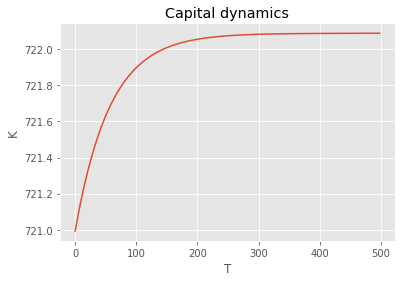

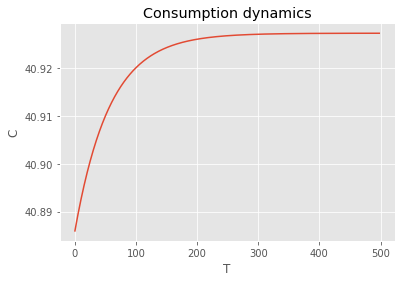

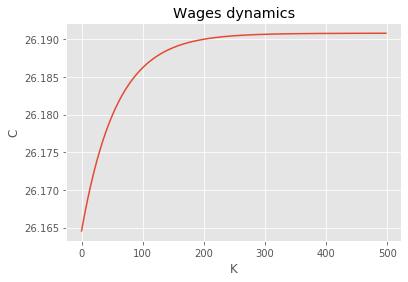

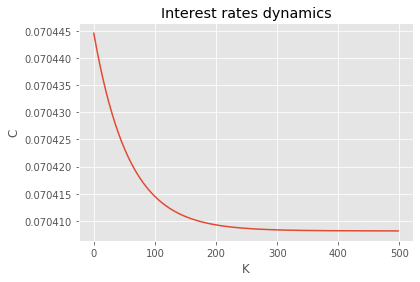

In [197]:
plt.plot(k_grid[1:])
plt.title('Capital dynamics')
plt.xlabel('T')
plt.ylabel('K')
plt.show()
plt.plot(c_grid[1:])
plt.title('Consumption dynamics')
plt.xlabel('T')
plt.ylabel('C')
plt.show()
plt.plot((1-alpha)*A*(k_grid[1:])**(alpha))
plt.title('Wages dynamics')
plt.xlabel('K')
plt.ylabel('C')
plt.show()

plt.plot(alpha*A*(k_grid[1:])**(alpha-1))
plt.title('Interest rates dynamics')
plt.xlabel('K')
plt.ylabel('C')
plt.show()

In [273]:
# now the parameters of the models have changed slightly
# and we assume that initially we start in a steady state level of capital
A = 2
theta   = 0.5
delta   = 1
 
k_ss_new = (((1/beta) - (1-delta))/(A*alpha))**(1/(alpha-1))
c_ss_new = A*k_ss_new**(alpha)-delta*k_ss_new    

k_grid_new = k_ss*np.ones(N)
c_grid_new = c_ss*np.ones(N)   

k_grid_new[-1] = k_ss_new + lb/100000000000
c_grid_new[-1] = c_ss_new + lb/100000000000


for i in range(1,N-1):
    c_grid_new[-1-i] = (c_grid_new[-i])*(beta*(1-delta + A*alpha*(k_grid_new[-i])**(alpha-1)))**(-1/theta)
    const = c_grid_new[-1-i] + k_grid_new[-i]
#     print(const)
    sol = scipy.optimize.root_scalar(f, bracket=[0, 1000*k_ss], method='brentq')
    k_grid_new[-1-i] = sol.root

ValueError: f(a) and f(b) must have different signs

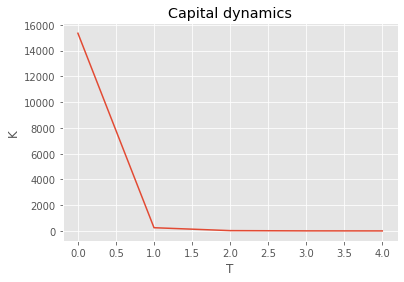

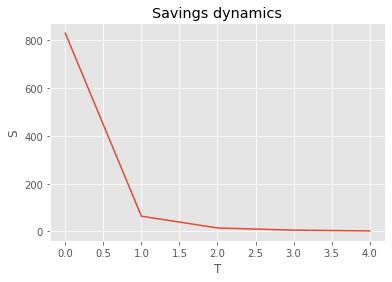

In [274]:
# we see a tremendously fast transition to a new steady state with lower capital and consumption
# 
plt.plot(k_grid_new[-5:])
plt.title('Capital dynamics')
plt.xlabel('T')
plt.ylabel('K')
plt.show()
plt.plot(A*(k_grid_new[-5:])**(alpha)-c_grid_new[-5:] )
plt.title('Savings dynamics')
plt.xlabel('T')
plt.ylabel('S')
plt.show()




In [275]:
# now the parameters of the models have changed slightly
# and we assume that initially we start in a steady state level of capital

theta   = 2
delta   = 1
 
k_ss_new = (((1/beta) - (1-delta))/(A*alpha))**(1/(alpha-1))
c_ss_new = A*k_ss_new**(alpha)-delta*k_ss_new    

k_grid_new = k_ss*np.ones(N)
c_grid_new = c_ss*np.ones(N)   

k_grid_new[-1] = k_ss_new + lb/100000000000
c_grid_new[-1] = c_ss_new + lb/100000000000


for i in range(1,N-1):
    c_grid_new[-1-i] = (c_grid_new[-i])*(beta*(1-delta + A*alpha*(k_grid_new[-i])**(alpha-1)))**(-1/theta)
    const = c_grid_new[-1-i] + k_grid_new[-i]
#     print(const)
    sol = scipy.optimize.root_scalar(f, bracket=[0, 10*k_ss], method='brentq')
    k_grid_new[-1-i] = sol.root

ValueError: f(a) and f(b) must have different signs

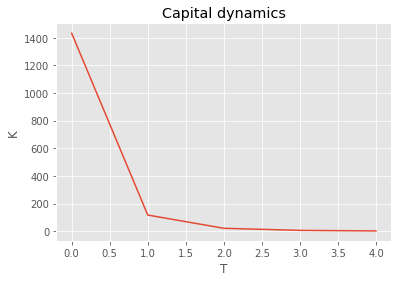

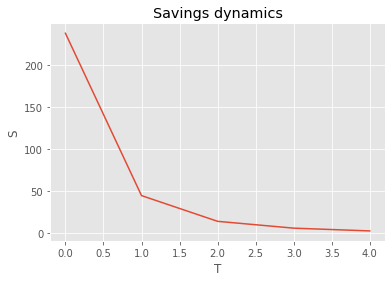

In [277]:
# With higher theta the transition speed is even faster
# 
plt.plot(k_grid_new[-5:])
plt.title('Capital dynamics')
plt.xlabel('T')
plt.ylabel('K')
plt.show()
plt.plot(A*(k_grid_new[-5:])**(alpha)-c_grid_new[-5:] )
plt.title('Savings dynamics')
plt.xlabel('T')
plt.ylabel('S')
plt.show()





In [278]:
# now the parameters of the models have changed slightly
# and we assume that initially we start in a steady state level of capital

theta   = 1
delta   = 1
 
k_ss_new = (((1/beta) - (1-delta))/(A*alpha))**(1/(alpha-1))
c_ss_new = A*k_ss_new**(alpha)-delta*k_ss_new    

k_grid_new = k_ss*np.ones(N)
c_grid_new = c_ss*np.ones(N)   

k_grid_new[-1] = k_ss_new + lb/100000000000
c_grid_new[-1] = c_ss_new + lb/100000000000


for i in range(1,N-1):
    c_grid_new[-1-i] = (c_grid_new[-i])*(beta*(1-delta + A*alpha*(k_grid_new[-i])**(alpha-1)))**(-1/theta)
    const = c_grid_new[-1-i] + k_grid_new[-i]
#     print(const)
    sol = scipy.optimize.root_scalar(f, bracket=[0, 100*k_ss], method='brentq')
    k_grid_new[-1-i] = sol.root

ValueError: f(a) and f(b) must have different signs

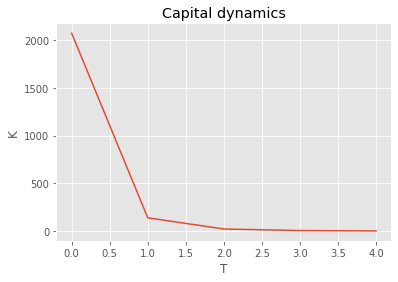

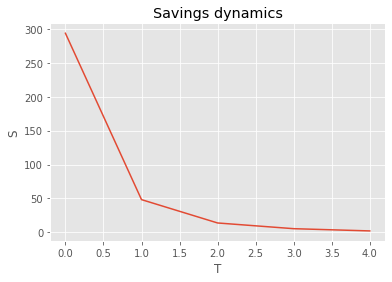

In [279]:
# With  theta =1 the transition speed is the fastest
# 
plt.plot(k_grid_new[-5:])
plt.title('Capital dynamics')
plt.xlabel('T')
plt.ylabel('K')
plt.show()
plt.plot(A*(k_grid_new[-5:])**(alpha)-c_grid_new[-5:] )
plt.title('Savings dynamics')
plt.xlabel('T')
plt.ylabel('S')
plt.show()






In [ ]:
# It appears that the lower is theta the faster is the transition to a new 
# steady state which can be explained by concavity of utility function
# the lower is theta the less concave our utility is and 
# the easier it is for an individual to transition to
# global optimum. While with strongly concave utility
# smoothing motives slow this process down